In [10]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-21 22:48:16 +07:00)


In [11]:
train_ds = pd.read_csv("./train_ds_small_process.csv")
test_ds = pd.read_csv("./test_ds_small_process.csv")

time: 16 ms (started: 2023-05-21 22:48:17 +07:00)


In [12]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 16 ms (started: 2023-05-21 22:48:17 +07:00)


In [13]:
from sklearn import metrics


time: 0 ns (started: 2023-05-21 22:48:17 +07:00)


In [14]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_absolute_percentage_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-21 22:48:17 +07:00)


In [15]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 0 ns (started: 2023-05-21 22:48:17 +07:00)


Random Forest Regressor


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 4884539.910951789
MSE = 0.42990252736039586
R2 = 0.39956857313424254
RMSE = 0.6556695260269428
time: 281 ms (started: 2023-05-21 22:48:17 +07:00)


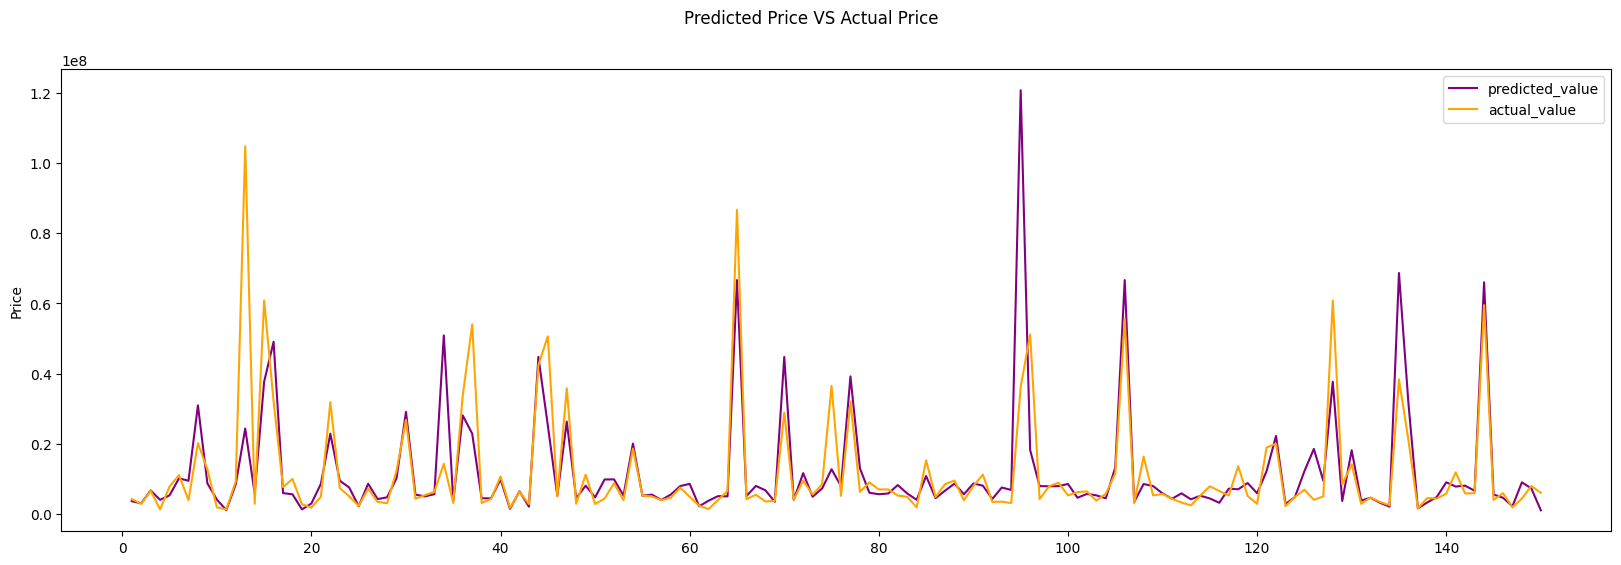

time: 313 ms (started: 2023-05-21 22:48:17 +07:00)


In [17]:
plot_residuals(y_test, y_pred)

In [18]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
time: 1min 4s (started: 2023-05-21 22:48:18 +07:00)


RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=0)

MAE = 4737708.802542211
MSE = 0.5616158480825754
R2 = 0.5056033934502335
RMSE = 0.7494103335840622


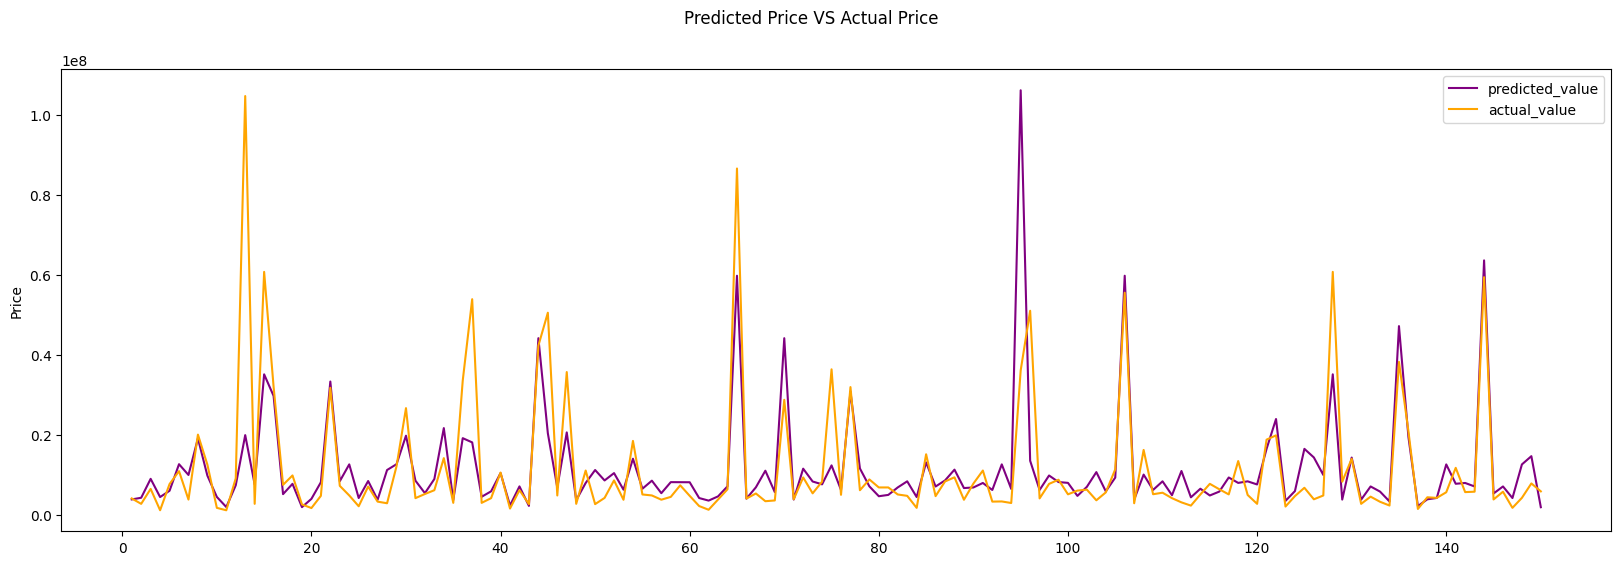

time: 453 ms (started: 2023-05-21 22:49:22 +07:00)


In [19]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

LogisticRegression()

MAE = 6809615.0
MSE = 0.6010313648808109
R2 = 0.029556004000630298
RMSE = 0.7752621265615978


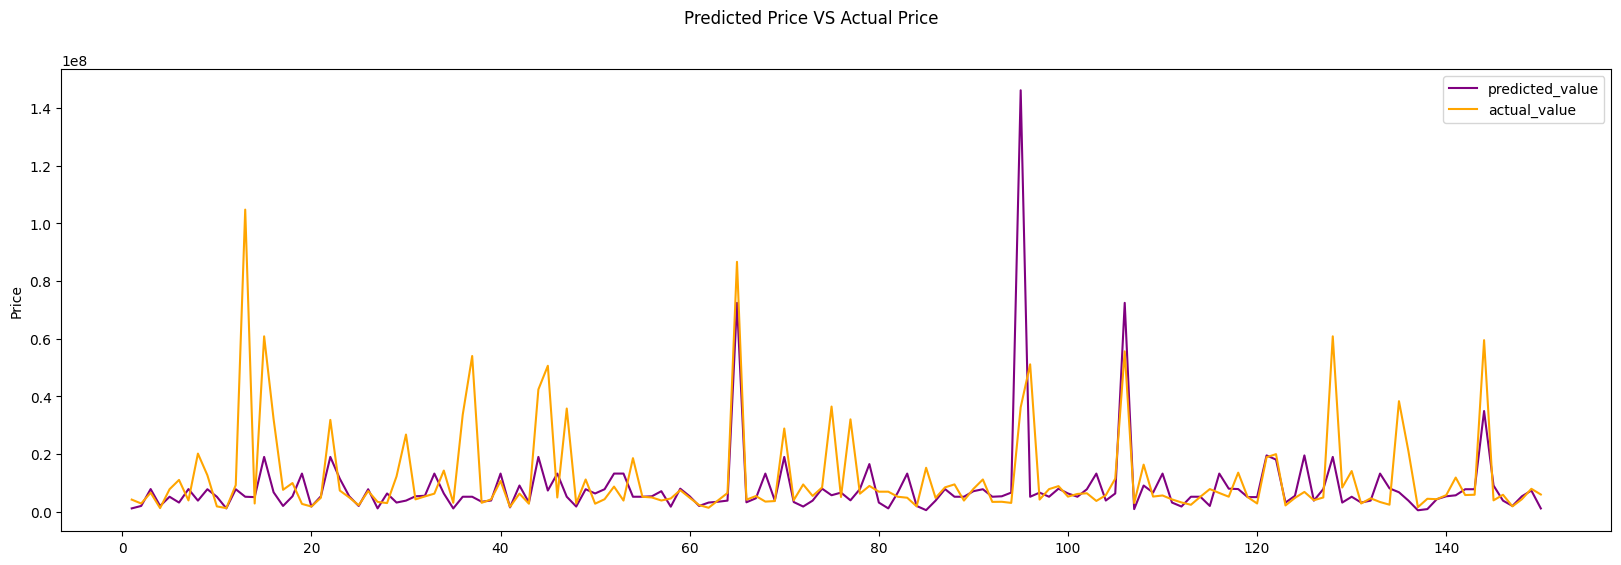

time: 1.2 s (started: 2023-05-21 22:49:23 +07:00)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [21]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'none'

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none']})

time: 33.6 s (started: 2023-05-21 22:49:24 +07:00)


LogisticRegression(C=0.01, penalty='none')

MAE = 6369884.0
MSE = 0.6966266893903084
R2 = 0.2206566012437391
RMSE = 0.8346416532802017


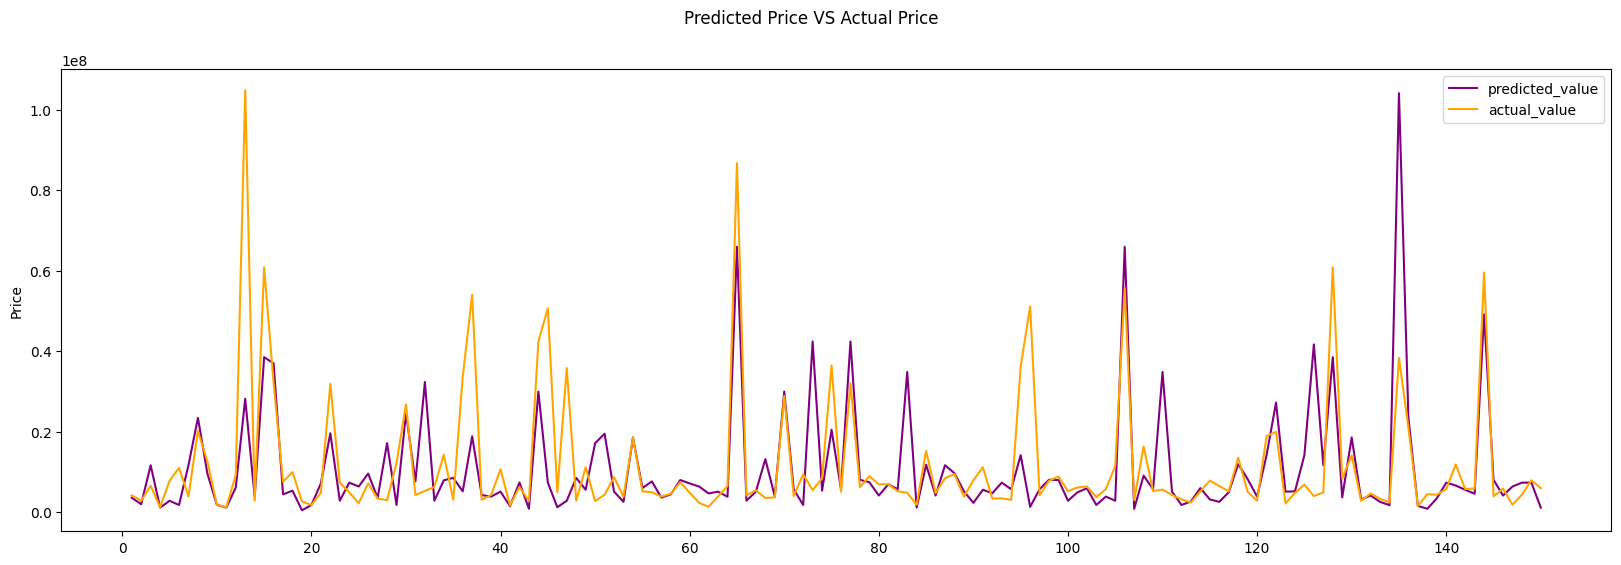

time: 1.5 s (started: 2023-05-21 22:49:58 +07:00)


In [22]:
logistic = LogisticRegression(penalty='none',C=0.01)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)